<a href="https://colab.research.google.com/github/Erssa001/ECGR_4105/blob/main/HW1_P1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/My Drive/2023-2024/ECGR_4105/D3.csv'
sample = pd.read_csv(file_path)

X1 = sample.values[:, 0]
X2 = sample.values[:, 1]
X3 = sample.values[:, 2]
inputs = [X1,X2,X3]
Y = sample.values[:, 3]
m = len(Y)  # Number of training examples
n = [len(X1), len(X2), len(X3)]  # Number of training examples

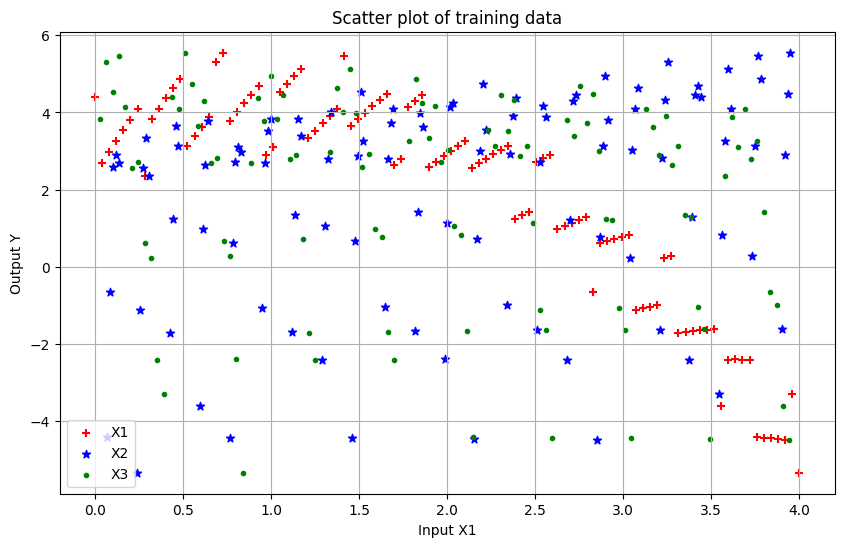

In [ ]:
# Scatter plot
plt.scatter(X1, Y, color='red', marker='+', label="X1")
plt.scatter(X2, Y, color='blue', marker='*', label="X2")
plt.scatter(X3, Y, color='green', marker='.', label="X3")
# Grid, labels, and title
plt.grid(True)
plt.rcParams["figure.figsize"] = (6, 6)
plt.xlabel('Input X1')
plt.ylabel('Output Y')
plt.title('Scatter plot of training data')
plt.legend(loc="best")

# Show the plot
plt.show()

In [ ]:

def reshape_inputs(X, m):
  X_0 = np.ones((m, 1))
  X_1 = X.reshape(m, 1)
  X_2 = np.hstack((X_0, X_1))
  return X_2

for i in range(len(inputs)):
  inputs[i - 1] = reshape_inputs(inputs[i - 1],m)

In [ ]:
def compute_cost(X, Y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [ ]:
# cost = compute_cost(X_2, Y, theta)
# print('The cost for given values of theta_0 and theta_1 =', cost)

In [ ]:
def gradient_descent(X, Y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(Y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, Y, theta)

    return theta, cost_history

In [ ]:
theta = np.zeros([3,2])
iterations = 2000
alpha = 0.025
inputs[0][:5]

array([[1.        , 0.        ],
       [1.        , 0.04040404],
       [1.        , 0.08080808],
       [1.        , 0.12121212],
       [1.        , 0.16161616]])

In [ ]:
cost_array = np.zeros([len(inputs), iterations])
for i in range(len(inputs)):
  theta[i - 1], cost_history = gradient_descent(inputs[i - 1], Y, theta[i - 1], alpha, iterations)
  print('Final value of theta =', theta[i - 1])
  print('cost_history =', cost_history)
  cost_array[i-1] = cost_history


Final value of theta = [ 2.87138829 -0.52046951]
cost_history = [5.2455414  5.04078579 4.88976723 ... 3.62945112 3.62945112 3.62945112]
Final value of theta = [ 5.92786161 -2.03830265]
cost_history = [5.42181288 5.33519028 5.2601802  ... 0.98499308 0.98499308 0.98499308]
Final value of theta = [0.73605369 0.55761024]
cost_history = [4.9859713  4.60001669 4.32335657 ... 3.59936602 3.59936602 3.59936602]


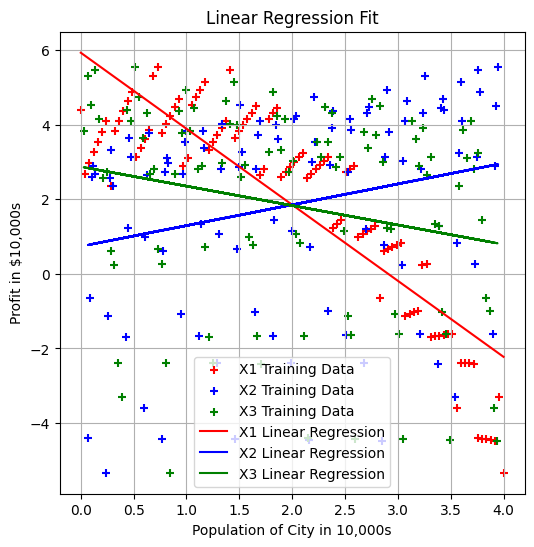

In [ ]:
# Assuming that X, y, and theta are already defined
# Also assuming that X has two columns: a feature column and a column of ones

# Scatter plot for the training data
plt.scatter(X1, Y, color='red', marker='+', label='X1 Training Data')
plt.scatter(X2, Y, color='blue', marker='+', label='X2 Training Data')
plt.scatter(X3, Y, color='green', marker='+', label='X3 Training Data')
# Line plot for the linear regression model
plt.plot(inputs[0][:, 1], inputs[0].dot(theta[0]), color='red', label='X1 Linear Regression')
plt.plot(inputs[1][:, 1], inputs[1].dot(theta[1]), color='blue', label='X2 Linear Regression')
plt.plot(inputs[2][:, 1], inputs[2].dot(theta[2]), color='green', label='X3 Linear Regression')

# Plot customizations
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Linear Regression Fit')
plt.legend()

# Show the plot
plt.show()


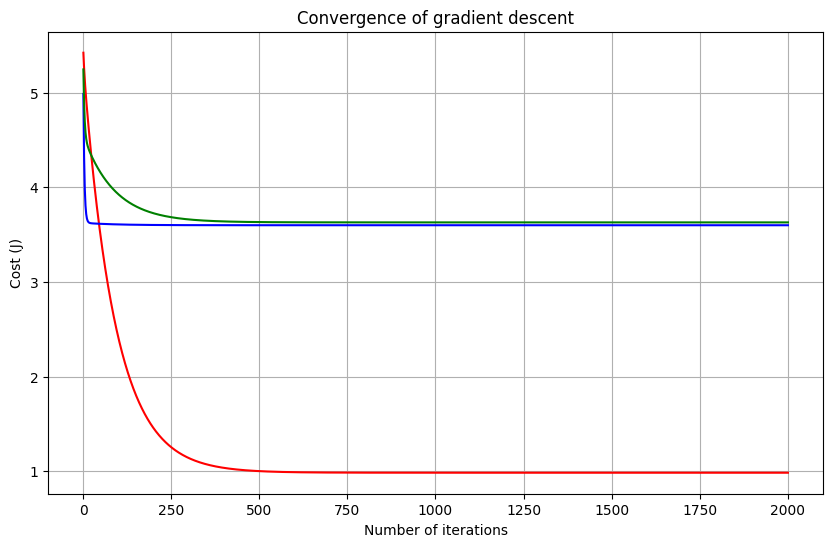

In [ ]:
plt.plot(range(1, iterations + 1), cost_array[0], color='red')
plt.plot(range(1, iterations + 1), cost_array[1], color='blue')
plt.plot(range(1, iterations + 1), cost_array[2], color='green')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()